### Step 1 : Import Liabraries and Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix
from sklearn import metrics, preprocessing
from sklearn.metrics import classification_report
import seaborn as sns

In [2]:
import os
os.chdir('Desktop')

In [3]:
data = pd.read_csv('Bank Customer Churn Predict.csv')

In [4]:
data.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### Step 2: Exploratory Data Analysis

<AxesSubplot:>

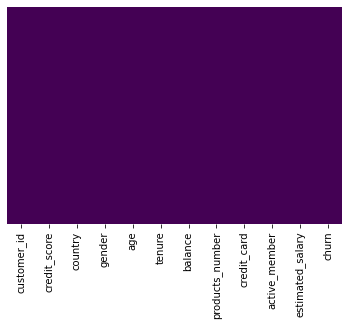

In [5]:
sns.heatmap(data.isnull(), yticklabels=False,cbar=False,cmap='viridis')# No null Values in the dataset

In [6]:
data.describe()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


<AxesSubplot:xlabel='credit_score', ylabel='count'>

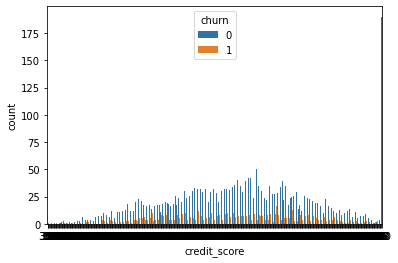

In [8]:
sns.countplot(x='credit_score',hue='churn',data=data)

C:\Users\Admin\AppData\Local\Temp\ipykernel_11744\2928512574.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data[features_mean].corr(), annot=True, square=True, cmap='coolwarm')


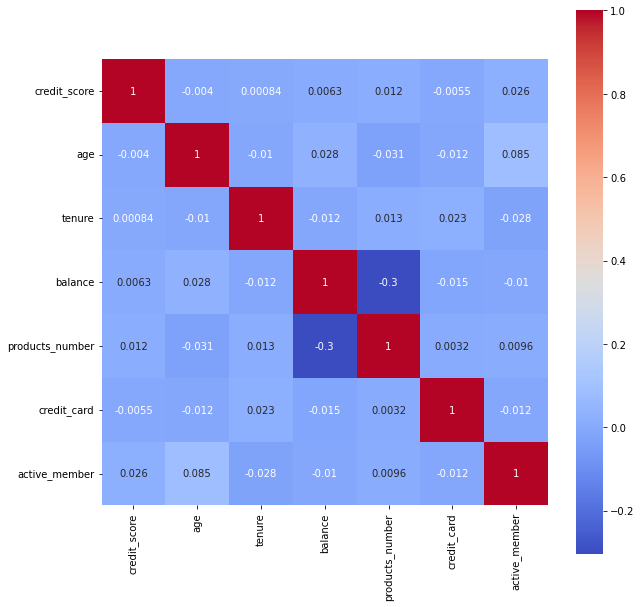

In [9]:
features_mean= list(data.columns[1:10])
plt.figure(figsize=(10,10))
sns.heatmap(data[features_mean].corr(), annot=True, square=True, cmap='coolwarm')
plt.show()

In [10]:
## Based on above correlation plot it shows variables have correlation with each other

<AxesSubplot:xlabel='country', ylabel='count'>

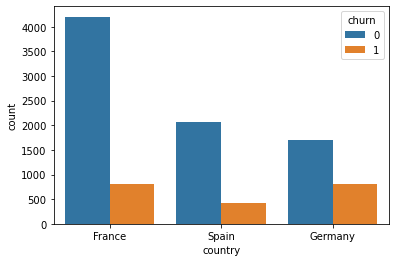

In [11]:
sns.countplot(x='country',hue='churn',data=data)

#### As we can see in above plot Germany have more number churn customer database

In [14]:
fig = px.histogram(data, x="churn",color="churn")
fig.update_layout(bargap=0.8)
fig.show()

NameError: name 'px' is not defined

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:254: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  baselines.iloc[:, cols] = (curves


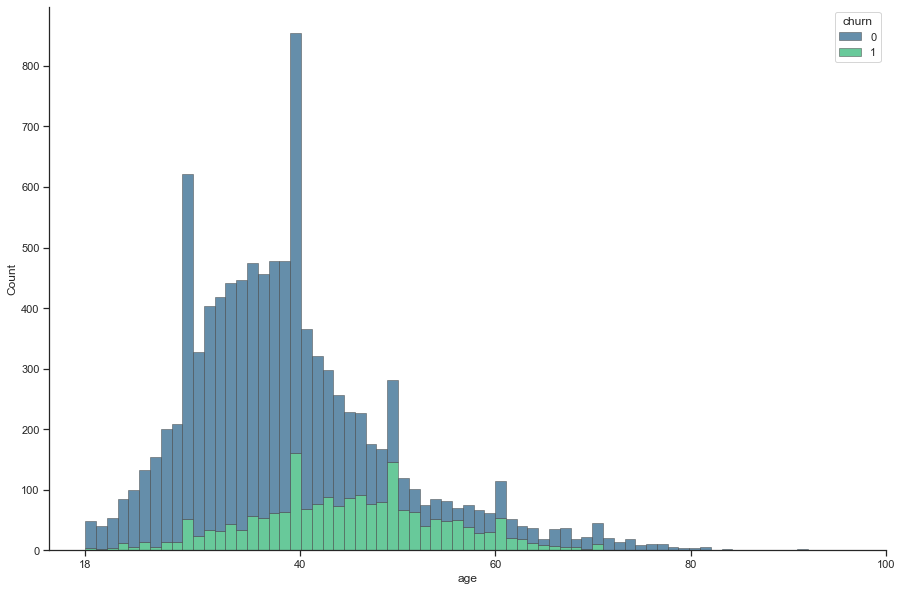

In [13]:
import matplotlib as mpl
sns.set_theme(style="ticks")
f, ax = plt.subplots(figsize=(15,10))
sns.despine(f)

sns.histplot(
    data,
    x="age", hue="churn",
    multiple="stack",
    palette="viridis",
    edgecolor=".3",
    linewidth=.5
)
ax.xaxis.set_major_formatter(mpl.ticker.ScalarFormatter())
ax.set_xticks([18, 40, 60, 80, 100])

#### As per above grpah churn customers are their from age group 40 to 55.
#### Customer age group from 25 to 40 are non churn customers.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='churn', ylabel='count'>

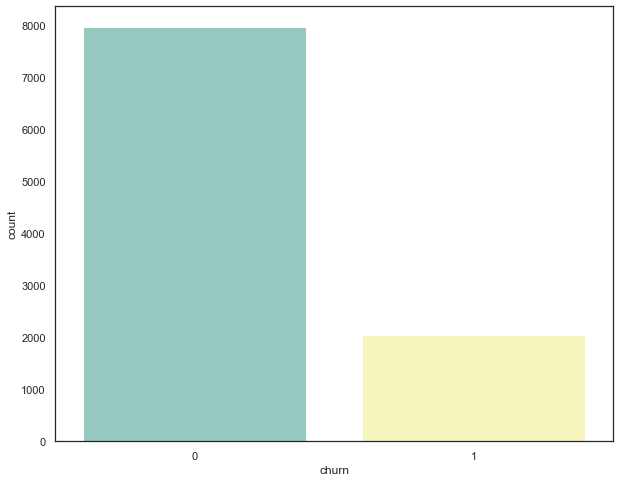

In [15]:
#Plot the M vs B ratio
sns.set_style("white")
sns.set_context({"figure.figsize": (10, 8)})
sns.countplot(data['churn'],label='Count',palette="Set3")

#### As per above graph it looks from entire population 20% are churn customers

<AxesSubplot:xlabel='credit_card', ylabel='count'>

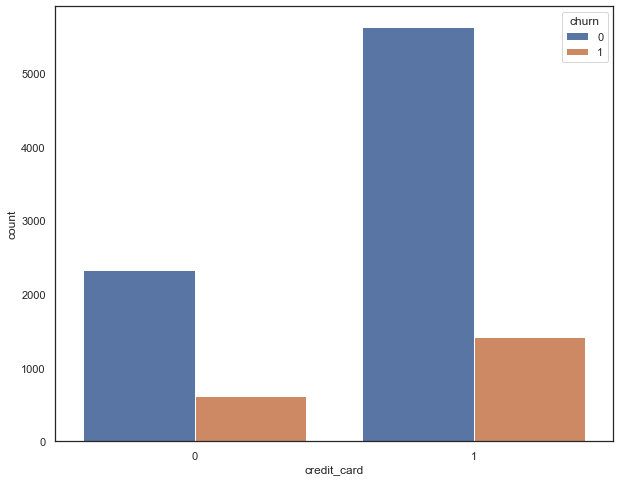

In [16]:
sns.countplot(x='credit_card',hue='churn',data=data)

<AxesSubplot:xlabel='gender', ylabel='count'>

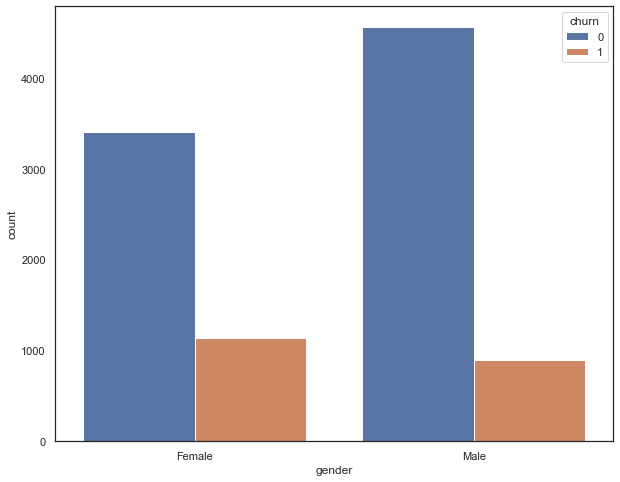

In [17]:
sns.countplot(x='gender',hue='churn',data=data)

#### It looks compared to male population female have more numbers as chrun

### Step 3: Split the Data into train and Test

In [18]:
data.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [19]:
# Cistomer Id coulumn not required in the model so dropping the column
data.drop('customer_id',axis = 1,inplace = True)


In [20]:
X = data.drop('churn' , axis=1)
y = data['churn']

In [21]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers = [('encoder',OneHotEncoder(),[1,2])],remainder = 'passthrough') #Categorical column at 3rd index columnwise and remaing column no changes
X = np.array(ct.fit_transform(X))

In [22]:
## Since gender column have Male and Female string characters so converting them into binary langauge
data.gender = data.gender.apply(lambda x: x if x == 1 else 0)


In [23]:
# Split the Ratio into Training and Test Set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 442)

In [24]:
X_train

array([[0.0000000e+00, 1.0000000e+00, 0.0000000e+00, ..., 1.0000000e+00,
        1.0000000e+00, 1.6522723e+05],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 1.0000000e+00,
        0.0000000e+00, 1.2462508e+05],
       [0.0000000e+00, 0.0000000e+00, 1.0000000e+00, ..., 1.0000000e+00,
        0.0000000e+00, 1.3294388e+05],
       ...,
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 1.9215654e+05],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 1.0000000e+00,
        1.0000000e+00, 9.6172400e+03],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 1.0000000e+00,
        0.0000000e+00, 7.3122500e+03]])

In [25]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train[:,0:] = sc.fit_transform(X_train[:,0:])
X_test[:,0:] = sc.transform(X_test[:,0:])

In [26]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train[:,5:] = sc.fit_transform(X_train[:,5:])
X_test[:,5:] = sc.transform(X_test[:,5:])

In [27]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train[:,-1:] = sc.fit_transform(X_train[:,-1:])
X_test[:,-1:] = sc.transform(X_test[:,-1:])

### Step 4: Model Building - Model 1: Logistic Regression


In [28]:
from sklearn.linear_model import LogisticRegression

In [29]:
logmodel = LogisticRegression(solver='lbfgs', max_iter=3000)
logmodel.fit(X_train,y_train)

LogisticRegression(max_iter=3000)

In [30]:
LogisticRegression(max_iter=3000)

LogisticRegression(max_iter=3000)

In [31]:
predictions = logmodel.predict(X_test)

In [32]:
from sklearn.metrics import confusion_matrix

In [33]:
print(confusion_matrix(y_test,predictions))

[[2307   98]
 [ 463  132]]


In [35]:
from sklearn.metrics import classification_report

In [36]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.83      0.96      0.89      2405
           1       0.57      0.22      0.32       595

    accuracy                           0.81      3000
   macro avg       0.70      0.59      0.61      3000
weighted avg       0.78      0.81      0.78      3000



### Model2: K - Nearest Neighbours

In [37]:
data= pd.get_dummies(data, columns= ['country', 'gender'], drop_first=True)  #### Encoding the Categorical data


In [38]:
# Import necessary modules
from sklearn.neighbors import KNeighborsClassifier
X = data.drop('churn' , axis=1)
y = data['churn']

In [39]:
# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(
             X, y, test_size = 0.2, random_state=42)
  
knn = KNeighborsClassifier(n_neighbors=7)
  
knn.fit(X_train, y_train)
  
# Predict on dataset which model has not seen before
print(knn.predict(X_test))

[0 0 0 ... 0 0 0]


In [40]:
knn = KNeighborsClassifier(n_neighbors=7)
  
knn.fit(X_train, y_train)
  
# Calculate the accuracy of the model
print(knn.score(X_test, y_test))

0.777


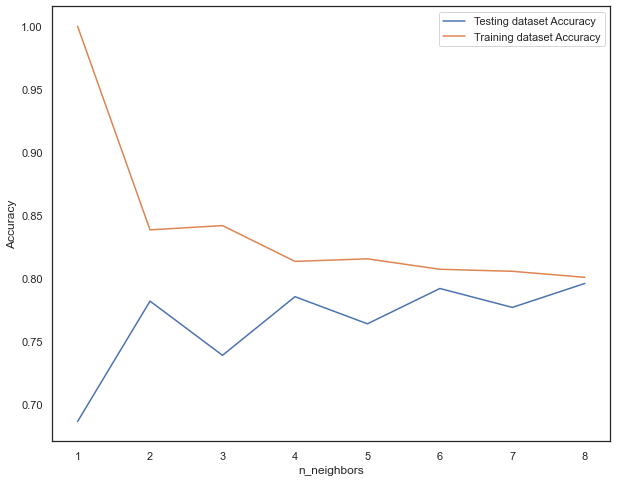

In [41]:
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))
  
# Loop over K values
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
      
    # Compute training and test data accuracy
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test)
  
# Generate plot
plt.plot(neighbors, test_accuracy, label = 'Testing dataset Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training dataset Accuracy')
  
plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.show()

### Model 3: Support Vector Machine

In [43]:
from sklearn.preprocessing import StandardScaler

# Normalize the  data (center around 0 and scale to remove the variance).
scaler =StandardScaler()
Xs = scaler.fit_transform(X)

In [44]:
from sklearn.decomposition import PCA
# feature extraction
pca = PCA(n_components=10)
fit = pca.fit(Xs)

# summarize components
#print("Explained Variance: %s") % fit.explained_variance_ratio_
#print(fit.components_)

In [45]:
# visualization
import seaborn as sns 
plt.style.use('fivethirtyeight')
sns.set_style("white")

plt.rcParams['figure.figsize'] = (8,4)
#plt.rcParams['axes.titlesize'] = 'large'

In [46]:
# Divide records in training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(Xs, y, test_size=0.3, random_state=2, stratify=y)

# Create an SVM classifier and train it on 70% of the data set.
clf = SVC(probability=True)
clf.fit(X_train, y_train)

# Analyze accuracy of predictions on 30% of the holdout test sample.
classifier_score = clf.score(X_test, y_test)
print ('\n➔ The classifier accuracy score is {:03.2f}\n'.format(classifier_score))


➔ The classifier accuracy score is 0.85



So We used 3 models Logistic regression which have accuracy score of 81%, KNN Model have 77% Accuracy and SVM classifire which have 85% accuracy.